In [5]:
# save_dir = "./sb3_pong_models_dqn"
# model_path = os.path.join(save_dir, "pong_dqn_final_model.zip")
# config = {
#     "env_name": "PongNoFrameskip-v4",
#     "num_envs": 1,
#     "seed": 100,
# }
# eval_env = make_atari_env(config["env_name"], n_envs=config["num_envs"], seed=config["seed"], env_kwargs={"render_mode": "human"})
# eval_env = VecFrameStack(eval_env, n_stack=4)
# model = DQN.load(model_path, env=eval_env)
# obs = eval_env.reset()
# done = False

# while not done:
#     eval_env.render()
#     action, _states = model.predict(obs, deterministic=True)
#     obss, rewards, dones, infos = eval_env.step(action)
#     done = dones[0]
    


In [ ]:
# PATH1 = "./DQN_1_stable_32_1e4_5m/sb3_pong_models/pong_dqn_final_model.zip"
# PATH2 = "./DQN_2_stable_256_25e4_5m/sb3_pong_models/pong_dqn_final_model.zip"
# TB1 = "./DQN_1_stable_32_1e4_5m/eval/"
# TB2 = "./DQN_2_stable_256_25e4_5m/eval/"
# os.makedirs(TB1, exist_ok=True)
# os.makedirs(TB2, exist_ok=True)

# EPISODES = 200
# config = {
#     "env_name": "PongNoFrameskip-v4",
#     "num_envs": 1,
#     "seed": 100,
# }
# # eval_env = make_atari_env(config["env_name"], n_envs=config["num_envs"], seed=config["seed"], env_kwargs={"render_mode": "human"})
# eval_env = make_atari_env(config["env_name"], n_envs=config["num_envs"], seed=config["seed"])
# env = VecFrameStack(eval_env, n_stack=4)
# # env = eval_env
# model = DQN.load(PATH2, env=env)
# # print(model.policy)

    
# vec_env = model.get_env()
# # for i in range(1000):
# #     action, _states = model.predict(obs, deterministic=True)
# #     obs, rewards, dones, info = vec_env.step(action)
# #     vec_env.render("human")
# writer = SummaryWriter(log_dir=TB2)
# for episode in range(EPISODES):
#     obs = vec_env.reset()
#     done = False
#     total_reward = 0
#     q_val_list = []
#     td_errors = []
#     step_count = 0
#     while not done:
#         obs_tensor = torch.tensor(obs, dtype=torch.float32).to(model.device)
#         q_values = model.q_net(obs_tensor)
#         q_val_list.append(q_values.detach().cpu().numpy().mean())

#         action, _ = model.predict(obs, deterministic=True)
#         next_obs, rewards, dones, info = vec_env.step(action)
#         with torch.no_grad():
#             next_q = model.q_net(torch.tensor(next_obs, dtype=torch.float32).to(model.device)).max(1)[0]
#         td_error = abs(rewards[0] + model.gamma * next_q.item() - q_values.max(1)[0].item())
#         td_errors.append(td_error)
#         done = dones[0]
#         total_reward += rewards[0]
#         step_count += 1
#         obs = next_obs
        
#     mean_q_value = np.mean(q_val_list)
#     mean_td = np.mean(td_errors)
#     writer.add_scalar("eval/episode_reward", total_reward, episode)
#     writer.add_scalar("eval/mean_q_value", mean_q_value, episode)
#     writer.add_scalar("eval/td_error", mean_td, episode)
#     writer.add_scalar("eval/episode_length", step_count, episode)
#     print(f"Episode {episode+1}: Reward={total_reward:.2f}, Mean Q={mean_q_value:.3f}, Mean TD Error (loss)={mean_td:.4f}, Steps={step_count}")

In [ ]:
from stable_baselines3 import DQN
import json
import gymnasium as gym
import os
from stable_baselines3 import DQN, PPO
from stable_baselines3.common.vec_env import DummyVecEnv, VecFrameStack, VecNormalize
import ale_py
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.env_util import make_atari_env
from stable_baselines3.common.callbacks import BaseCallback, CheckpointCallback
import numpy as np
from stable_baselines3.common.evaluation import evaluate_policy
import time
import torch
from torch.utils.tensorboard import SummaryWriter







Wrapping the env in a VecTransposeImage.
Episode 1: Reward=19.00, Mean Q=1.289, Mean TD Error (loss)=0.0279, Steps=1852
Episode 2: Reward=13.00, Mean Q=1.103, Mean TD Error (loss)=0.0601, Steps=3805
Episode 3: Reward=19.00, Mean Q=1.290, Mean TD Error (loss)=0.0279, Steps=1851
Episode 4: Reward=19.00, Mean Q=1.261, Mean TD Error (loss)=0.0309, Steps=1971
Episode 5: Reward=19.00, Mean Q=1.290, Mean TD Error (loss)=0.0279, Steps=1849
Episode 6: Reward=19.00, Mean Q=1.290, Mean TD Error (loss)=0.0279, Steps=1852
Episode 7: Reward=13.00, Mean Q=1.103, Mean TD Error (loss)=0.0601, Steps=3799
Episode 8: Reward=14.00, Mean Q=1.090, Mean TD Error (loss)=0.0615, Steps=3499
Episode 9: Reward=13.00, Mean Q=1.103, Mean TD Error (loss)=0.0601, Steps=3801
Episode 10: Reward=13.00, Mean Q=1.103, Mean TD Error (loss)=0.0601, Steps=3800
Episode 11: Reward=13.00, Mean Q=1.103, Mean TD Error (loss)=0.0601, Steps=3802
Episode 12: Reward=19.00, Mean Q=1.289, Mean TD Error (loss)=0.0279, Steps=1853
Episode 

In [3]:
%reload_ext tensorboard
%tensorboard --logdir ./DQN_1_stable_32_1e4_5m/
# %tensorboard --logdir ./PPO_1_stable_256_25e4_5m/



Reusing TensorBoard on port 6006 (pid 111217), started 0:00:07 ago. (Use '!kill 111217' to kill it.)

# TRAINING

In [ ]:
import os
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator
TB1 = "./DQN_1_stable_32_1e4_5m/"
TB2 = "./DQN_2_stable_256_25e4_5m/"
log_dir = TB1

event_file = [f for f in os.listdir(log_dir) if "tfevents" in f][0]
event_path = os.path.join(log_dir, event_file)

ea = event_accumulator.EventAccumulator(event_path)
ea.Reload()  

print("Available metrics:", ea.Tags()["scalars"])

rewards = ea.Scalars("eval/episode_reward") 
q_values = ea.Scalars("eval/mean_q_value")    
td_errors = ea.Scalars("eval/td_error")
episode_length = ea.Scalars("rollout/ep_len_mean")

reward_steps = [x.step for x in rewards]
reward_values = [x.value for x in rewards]

q_steps = [x.step for x in q_values]
q_values_data = [x.value for x in q_values]

td_steps = [x.step for x in td_errors]
td_values = [x.value for x in td_errors]

episode_length_steps = [x.step for x in episode_length]
episode_length_values = [x.value for x in episode_length]

plt.figure(figsize=(8, 5))
plt.plot(reward_steps, reward_values, color='tab:blue')
plt.title("Episode Reward")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 5))
plt.plot(q_steps, q_values_data, color='tab:green')
plt.title("Mean Q-Value per Episode")
plt.xlabel("Episode")
plt.ylabel("Q-Value")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(td_steps, td_values, color='tab:red')
plt.title("Mean TD Error (Loss)")
plt.xlabel("Episode")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(episode_length_steps, episode_length_values, color='tab:orange')
plt.title("Episode Length (Steps)")
plt.xlabel("Episode")
plt.ylabel("Steps")
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(reward_steps, reward_values, label="Reward")
plt.plot(q_steps, q_values_data, label="Mean Q-Value")
plt.plot(td_steps, td_values, label="Mean TD Error (Loss)")
plt.xlabel("Episode")
plt.ylabel("Value")
plt.title("Evaluation Metrics from TensorBoard")
plt.legend()
plt.grid(True)
plt.show()

2025-10-22 18:57:18.354652: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Available metrics: ['rollout/ep_len_mean', 'rollout/ep_rew_mean', 'rollout/exploration_rate', 'time/fps', 'train/learning_rate', 'train/loss']


KeyError: 'Key eval/episode_reward was not found in Reservoir'

Available metrics: ['eval/episode_reward', 'eval/mean_q_value', 'eval/td_error', 'eval/episode_length']


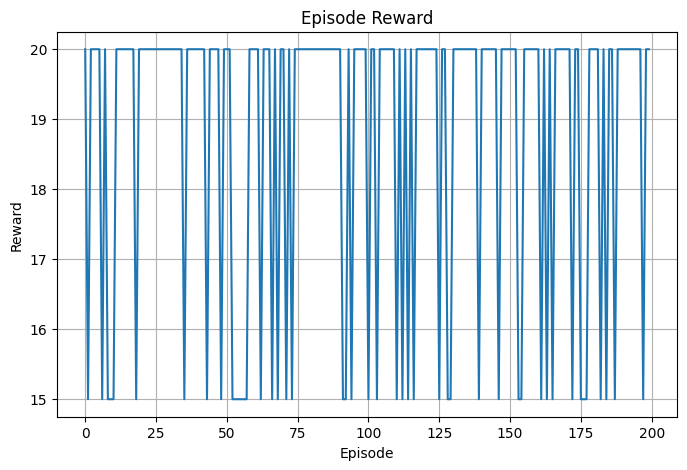

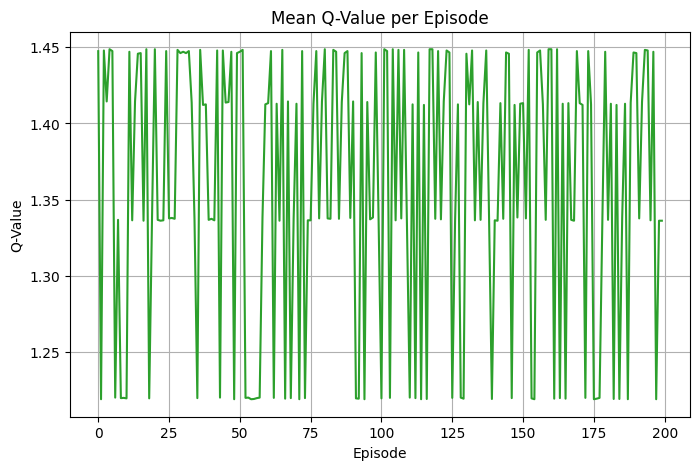

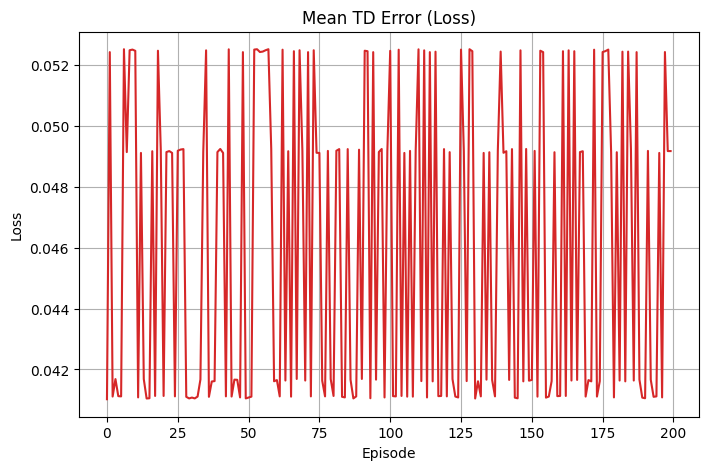

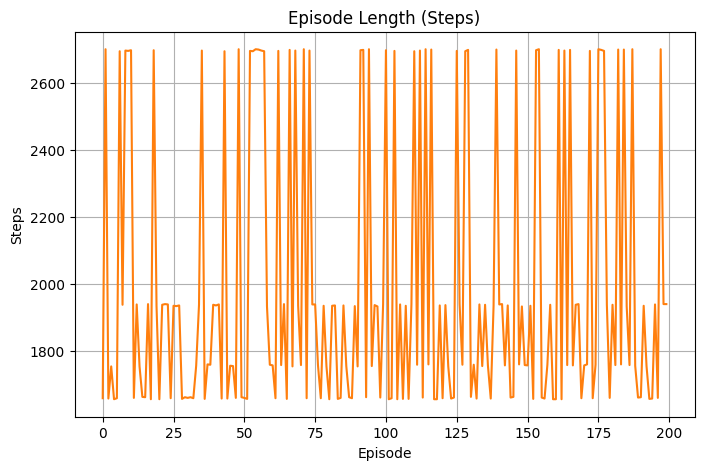

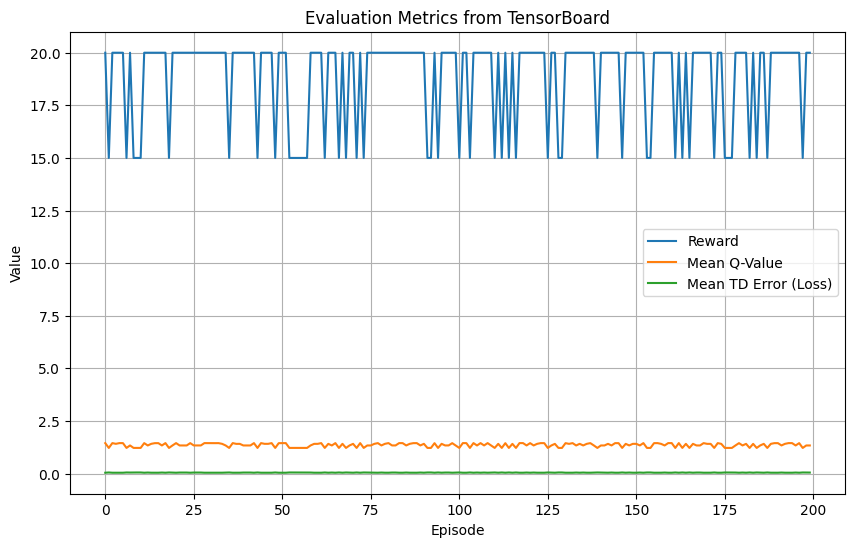

In [21]:
import os
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator
TB1 = "./DQN_1_stable_32_1e4_5m/eval_1/"
TB2 = "./DQN_2_stable_256_25e4_5m/eval_1/"
log_dir = TB1

event_file = [f for f in os.listdir(log_dir) if "tfevents" in f][0]
event_path = os.path.join(log_dir, event_file)

ea = event_accumulator.EventAccumulator(event_path)
ea.Reload()  

print("Available metrics:", ea.Tags()["scalars"])

rewards = ea.Scalars("eval/episode_reward") 
q_values = ea.Scalars("eval/mean_q_value")    
td_errors = ea.Scalars("eval/td_error")
episode_length = ea.Scalars("eval/episode_length")

reward_steps = [x.step for x in rewards]
reward_values = [x.value for x in rewards]

q_steps = [x.step for x in q_values]
q_values_data = [x.value for x in q_values]

td_steps = [x.step for x in td_errors]
td_values = [x.value for x in td_errors]

episode_length_steps = [x.step for x in episode_length]
episode_length_values = [x.value for x in episode_length]

plt.figure(figsize=(8, 5))
plt.plot(reward_steps, reward_values, color='tab:blue')
plt.title("Episode Reward")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 5))
plt.plot(q_steps, q_values_data, color='tab:green')
plt.title("Mean Q-Value per Episode")
plt.xlabel("Episode")
plt.ylabel("Q-Value")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(td_steps, td_values, color='tab:red')
plt.title("Mean TD Error (Loss)")
plt.xlabel("Episode")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(episode_length_steps, episode_length_values, color='tab:orange')
plt.title("Episode Length (Steps)")
plt.xlabel("Episode")
plt.ylabel("Steps")
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(reward_steps, reward_values, label="Reward")
plt.plot(q_steps, q_values_data, label="Mean Q-Value")
plt.plot(td_steps, td_values, label="Mean TD Error (Loss)")
plt.xlabel("Episode")
plt.ylabel("Value")
plt.title("Evaluation Metrics from TensorBoard")
plt.legend()
plt.grid(True)
plt.show()

Available metrics: ['eval/episode_reward', 'eval/mean_q_value', 'eval/td_error', 'eval/episode_length']


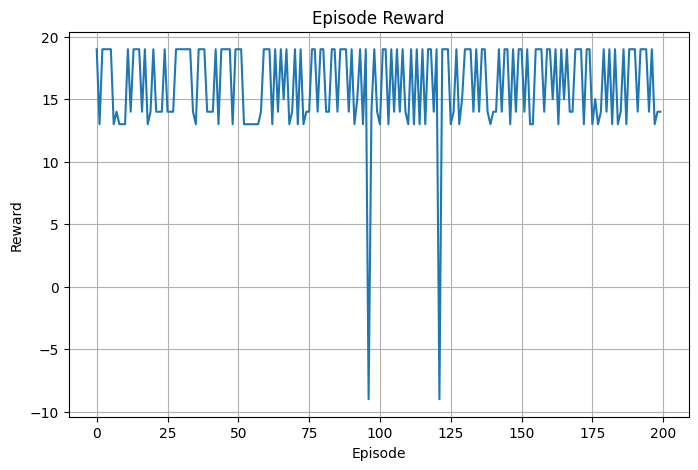

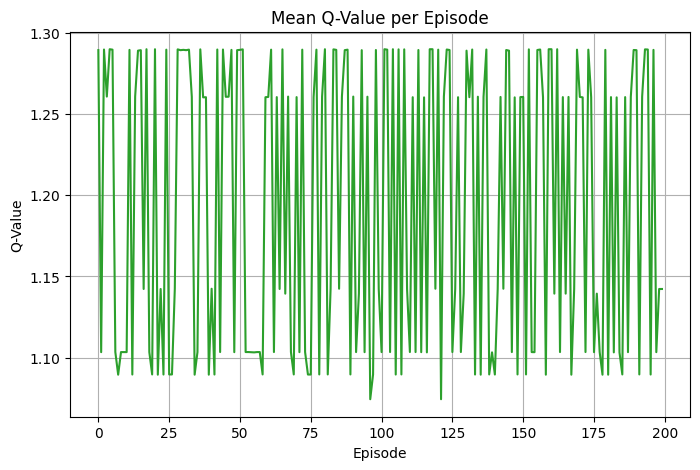

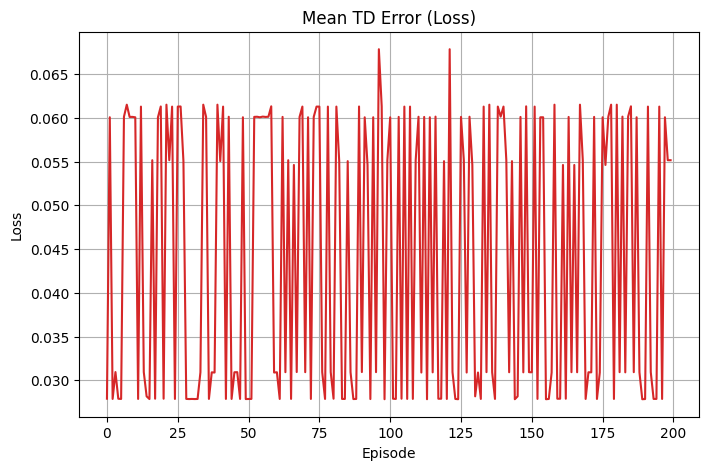

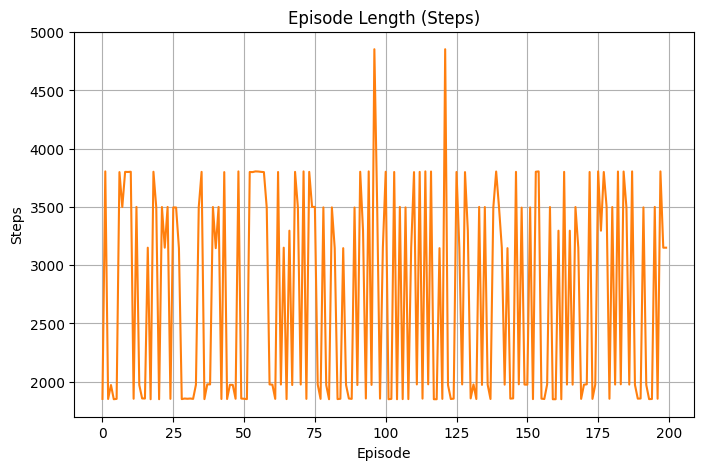

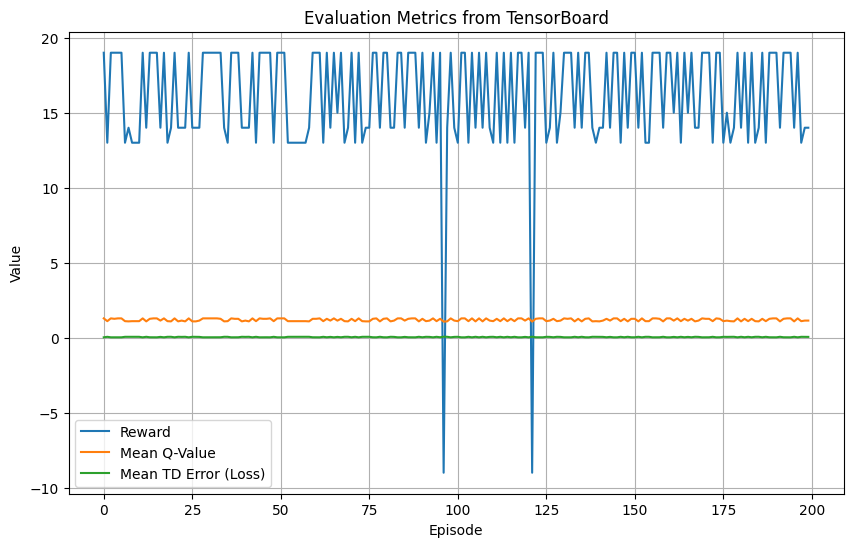

In [22]:
TB1 = "./DQN_1_stable_32_1e4_5m/eval_1/"
TB2 = "./DQN_2_stable_256_25e4_5m/eval_1/"
log_dir = TB2

event_file = [f for f in os.listdir(log_dir) if "tfevents" in f][0]
event_path = os.path.join(log_dir, event_file)

ea = event_accumulator.EventAccumulator(event_path)
ea.Reload()  

print("Available metrics:", ea.Tags()["scalars"])

rewards = ea.Scalars("eval/episode_reward") 
q_values = ea.Scalars("eval/mean_q_value")    
td_errors = ea.Scalars("eval/td_error")
episode_length = ea.Scalars("eval/episode_length")

reward_steps = [x.step for x in rewards]
reward_values = [x.value for x in rewards]

q_steps = [x.step for x in q_values]
q_values_data = [x.value for x in q_values]

td_steps = [x.step for x in td_errors]
td_values = [x.value for x in td_errors]

episode_length_steps = [x.step for x in episode_length]
episode_length_values = [x.value for x in episode_length]

plt.figure(figsize=(8, 5))
plt.plot(reward_steps, reward_values, color='tab:blue')
plt.title("Episode Reward")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 5))
plt.plot(q_steps, q_values_data, color='tab:green')
plt.title("Mean Q-Value per Episode")
plt.xlabel("Episode")
plt.ylabel("Q-Value")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(td_steps, td_values, color='tab:red')
plt.title("Mean TD Error (Loss)")
plt.xlabel("Episode")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(episode_length_steps, episode_length_values, color='tab:orange')
plt.title("Episode Length (Steps)")
plt.xlabel("Episode")
plt.ylabel("Steps")
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(reward_steps, reward_values, label="Reward")
plt.plot(q_steps, q_values_data, label="Mean Q-Value")
plt.plot(td_steps, td_values, label="Mean TD Error (Loss)")
plt.xlabel("Episode")
plt.ylabel("Value")
plt.title("Evaluation Metrics from TensorBoard")
plt.legend()
plt.grid(True)
plt.show()